In [2]:
import pandas as pd        

In [109]:
for i in range(99):
    if i == 0:
        first_file_name = "./01_data_원본/포항시_버스_사용자_교통카드_사용_내역/trfcard ({})/trfcard.csv".format(0)
        first_file = pd.read_csv(first_file_name)
    next_file_name =  "./01_data_원본/포항시_버스_사용자_교통카드_사용_내역/trfcard ({})/trfcard.csv".format(i+1)
    next_file = pd.read_csv(next_file_name)
    first_file = pd.concat([first_file, next_file], ignore_index=True)
df = first_file


In [110]:
df.columns = ["승차시각", "하차시각", "노선명", "노선설명", "승객연령",
                       "환승여부", "추가운임여부", "승차정류장", "승차정류장 GPS X",
                       "승차정류장 GPS Y", "하차정류장", "하차정류장 GPS X", "하차정류장 GPS Y"]

In [183]:
df = df.astype({"승차시각" : "str"})
df_1 = df[["승차시각", "승객연령"]].reset_index(drop=True)
df_1 = df_1.sort_values(by = "승차시각", ascending=True)
df_1 = df_1.reset_index(drop=True)
df_1

,승차시각,승객연령
0,20200101051548,일반
1,20200101051548,일반
2,20200101051559,일반
3,20200101051559,일반
4,20200101051603,일반
...,...,...
1057867,20200331233806,일반
1057868,20200331234833,일반
1057869,20200331234833,일반
1057870,20200331235643,일반


In [184]:
date = df_1["승차시각"]
day =[]
for i in range(len(date)):
day.append(date[i][:8])
df_1["날짜"] = day
df_1

,승차시각,승객연령,날짜
0,20200101051548,일반,20200101
1,20200101051548,일반,20200101
2,20200101051559,일반,20200101
3,20200101051559,일반,20200101
4,20200101051603,일반,20200101
...,...,...,...
1057867,20200331233806,일반,20200331
1057868,20200331234833,일반,20200331
1057869,20200331234833,일반,20200331
1057870,20200331235643,일반,20200331


In [186]:
df_1 = df_1[["날짜","승객연령"]].reset_index(drop=True)
#df_1["카운트"] = 1
df_1

,날짜,승객연령
0,20200101,일반
1,20200101,일반
2,20200101,일반
3,20200101,일반
4,20200101,일반
...,...,...
1057867,20200331,일반
1057868,20200331,일반
1057869,20200331,일반
1057870,20200331,일반


In [189]:
a = pd.crosstab(index=df_1.날짜, columns = df_1.승객연령).reset_index()
a

승객연령,날짜,None,어린이,일반,청소년
0,20200101,8,310,16662,1758
1,20200102,21,219,14715,1230
2,20200103,24,209,15085,1296
3,20200104,26,187,11400,943
4,20200105,24,216,17216,1598
...,...,...,...,...,...
61,20200326,8,35,2619,235
62,20200327,7,25,4648,303
63,20200328,7,27,3576,265
64,20200329,2,18,2228,236


In [246]:
b = a[["날짜","어린이","일반","청소년"]].reset_index(drop=True)
b

승객연령,날짜,어린이,일반,청소년
0,20200101,310,16662,1758
1,20200102,219,14715,1230
2,20200103,209,15085,1296
3,20200104,187,11400,943
4,20200105,216,17216,1598
...,...,...,...,...
61,20200326,35,2619,235
62,20200327,25,4648,303
63,20200328,27,3576,265
64,20200329,18,2228,236


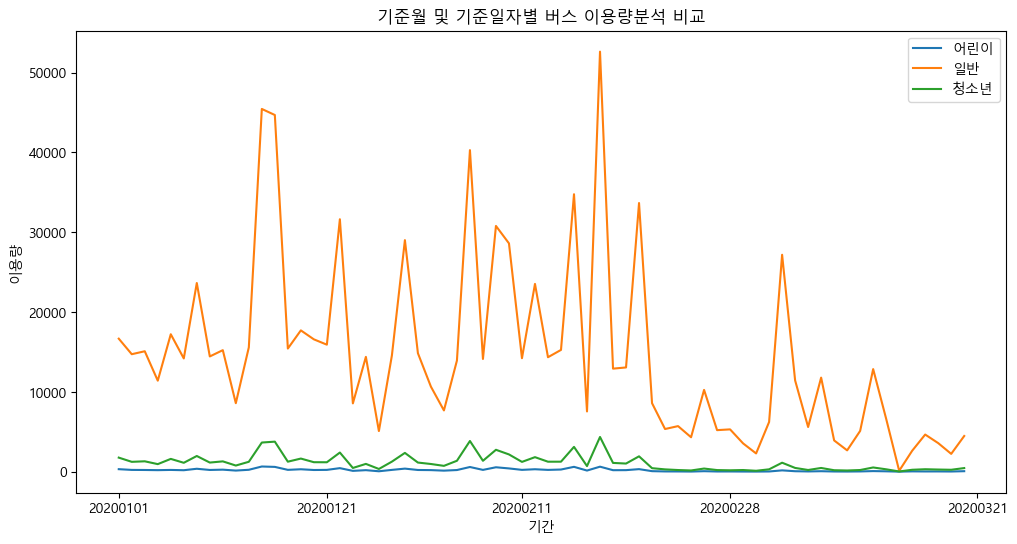

In [221]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글처리 기본적으로 사용
# 윈도우 용
plt.rc("font",family = "Malgun Gothic")
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize = (12,6))
plt.plot(b["날짜"], b["어린이"], label="어린이")
plt.plot(b["날짜"], b["일반"], label="일반")
plt.plot(b["날짜"], b["청소년"], label="청소년")
plt.xlabel("기간")
plt.ylabel("이용량")
plt.title("기준월 및 기준일자별 버스 이용량분석 비교")
plt.xticks(["20200101","20200121","20200211",
                "20200228","20200321"])
plt.legend()

plt.show()

In [227]:
c = df[["승차시각", "승객연령"]].reset_index(drop=True)
c = c.sort_values(by = "승차시각", ascending=True)
c = c.reset_index(drop=True)
c

,승차시각,승객연령
0,20200101051548,일반
1,20200101051548,일반
2,20200101051559,일반
3,20200101051559,일반
4,20200101051603,일반
...,...,...
1057867,20200331233806,일반
1057868,20200331234833,일반
1057869,20200331234833,일반
1057870,20200331235643,일반


In [229]:
date = c["승차시각"]
month = []
day =[]
hour = []
minute = []
second = []
for i in range(len(date)):
    month.append(date[i][4:6])
    day.append(date[i][6:8])
    hour.append(date[i][8:10])
    minute.append(date[i][10:12])
    second.append(date[i][12:14])
c["월"] = month
c["일"] = day
c["시"] = hour
c["분"] = minute
c["초"] = second
c

,승차시각,승객연령,월,일,시,분,초
0,20200101051548,일반,01,01,05,15,48
1,20200101051548,일반,01,01,05,15,48
2,20200101051559,일반,01,01,05,15,59
3,20200101051559,일반,01,01,05,15,59
4,20200101051603,일반,01,01,05,16,03
...,...,...,...,...,...,...,...
1057867,20200331233806,일반,03,31,23,38,06
1057868,20200331234833,일반,03,31,23,48,33
1057869,20200331234833,일반,03,31,23,48,33
1057870,20200331235643,일반,03,31,23,56,43


In [289]:
q = pd.crosstab(index=c.일, columns = c.승객연령).reset_index()
q

승객연령,일,None,어린이,일반,청소년
0,01,20,511,29592,2827
1,02,52,368,28609,2248
2,03,54,369,42260,2416
3,04,49,443,36754,2773
4,05,77,825,63093,5646
5,06,24,235,25967,1572
6,07,32,603,41668,3502
7,08,63,774,47888,4023
8,09,28,250,15222,1288
9,10,39,431,33707,2362


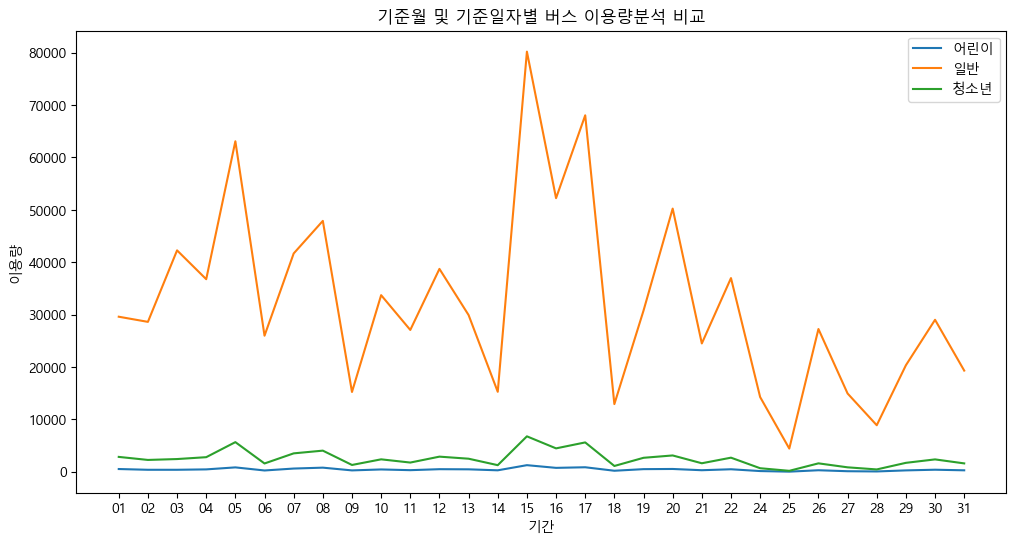

In [259]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글처리 기본적으로 사용
# 윈도우 용
plt.rc("font",family = "Malgun Gothic")
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize = (12,6))
plt.plot(q["일"], q["어린이"], label="어린이")
plt.plot(q["일"], q["일반"], label="일반")
plt.plot(q["일"], q["청소년"], label="청소년")
plt.xlabel("기간")
plt.ylabel("이용량")
plt.title("기준월 및 기준일자별 버스 이용량분석 비교")
# plt.xticks(["20200101","20200121","20200211",
#                 "20200228","20200321"])
plt.legend()

plt.show()

In [269]:
c

,승차시각,승객연령,월,일,시,분,초
0,20200101051548,일반,01,01,05,15,48
1,20200101051548,일반,01,01,05,15,48
2,20200101051559,일반,01,01,05,15,59
3,20200101051559,일반,01,01,05,15,59
4,20200101051603,일반,01,01,05,16,03
...,...,...,...,...,...,...,...
1057867,20200331233806,일반,03,31,23,38,06
1057868,20200331234833,일반,03,31,23,48,33
1057869,20200331234833,일반,03,31,23,48,33
1057870,20200331235643,일반,03,31,23,56,43


,일,승객연령,카운트
0,01,일반,1
1,01,일반,1
2,01,일반,1
3,01,일반,1
4,01,일반,1
...,...,...,...
1057867,31,일반,1
1057868,31,일반,1
1057869,31,일반,1
1057870,31,일반,1


In [303]:
w = c.pivot_table(values = "승차시각",columns="승객연령",index="시",aggfunc="count")
w = w.reset_index()
w

승객연령,시,None,어린이,일반,청소년
0,00,NaN,NaN,3.0,NaN
1,05,6.0,10.0,7406.0,223.0
2,06,54.0,49.0,23583.0,1087.0
3,07,41.0,286.0,49473.0,2444.0
4,08,78.0,624.0,66954.0,3081.0
5,09,84.0,610.0,68593.0,3070.0
6,10,97.0,731.0,68384.0,3772.0
7,11,108.0,924.0,71646.0,4732.0
8,12,124.0,1192.0,71736.0,5983.0
9,13,88.0,1220.0,73391.0,6428.0


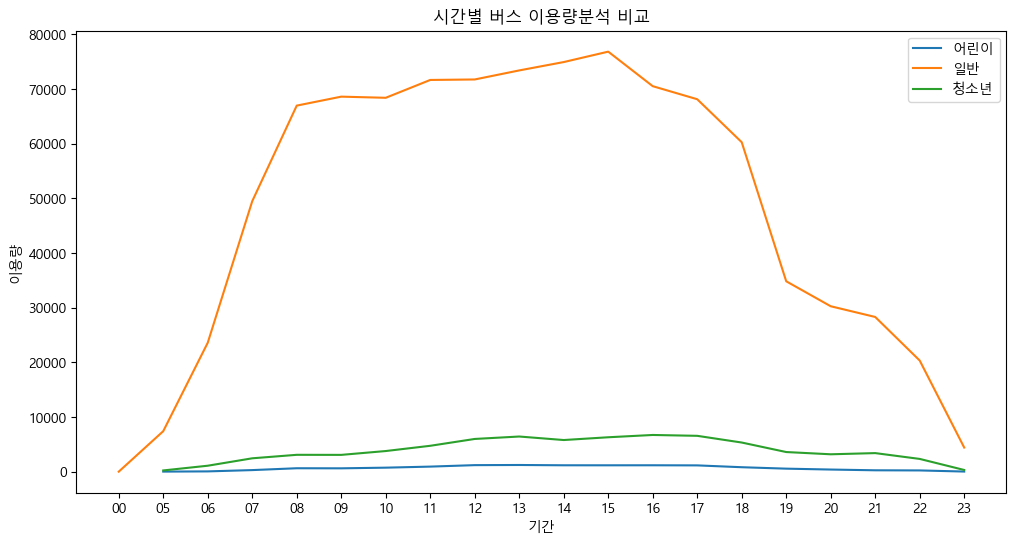

In [304]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns

# 한글처리 기본적으로 사용
# 윈도우 용
plt.rc("font",family = "Malgun Gothic")
# 음수 기호 처리 설정
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize = (12,6))
plt.plot(w["시"], w["어린이"], label="어린이")
plt.plot(w["시"], w["일반"], label="일반")
plt.plot(w["시"], w["청소년"], label="청소년")
plt.xlabel("기간")
plt.ylabel("이용량")
plt.title("시간별 버스 이용량분석 비교")
# plt.xticks(["20200101","20200121","20200211",
#                 "20200228","20200321"])
plt.legend()

plt.show()